In [93]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [94]:
#Datasets for learning
iris = sns.load_dataset("iris")

In [164]:
#iris

### Explore the three known groups in the data (species)

In [166]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=iris, x='petal_length', y='sepal_length', hue='species')
plt.show()

### Create unlabeled dataset

In [178]:
iris_unlabeled = iris.drop('species', axis=1)

In [167]:
#iris_unlabeled

# K-Means Clustering (Clustering Algorithm)

In [12]:
from sklearn.cluster import KMeans #import algorithm from its family

In [141]:
algorithm = KMeans(n_clusters=3) #instantiate algorithm with number of expected groups 

In [142]:
algorithm.fit(iris_unlabeled) #training with unlabelled data

KMeans(n_clusters=3)

In [143]:
predicted = algorithm.predict(iris_unlabeled) #predict the groups based on set number of groups

In [168]:
#predicted

In [169]:
iris_labeled = pd.concat([iris_unlabeled, pd.DataFrame(predicted)], axis=1)

In [171]:
#iris_labeled

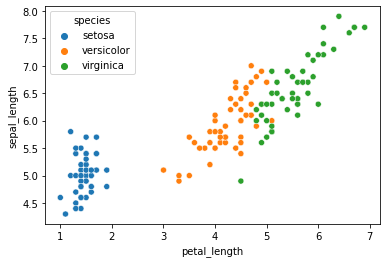

In [146]:
sns.scatterplot(data=iris, x='petal_length', y='sepal_length', hue='species')
plt.show()

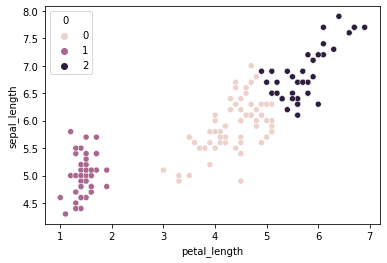

In [147]:
sns.scatterplot(data=iris_labeled, x='petal_length', y='sepal_length', hue=0)
plt.show()

### Create categories based on the numeric labels that were predicted

In [172]:
iris_labeled.rename(columns={0: 'predicted'}, inplace=True)

In [173]:
def create_categories(x):
    if x['predicted'] == 0:
        label = 'versicolor'
    elif x['predicted'] == 1:
        label = 'setosa'
    else:
        label = 'virginica'
    
    return label

In [174]:
iris_labeled['label'] = iris_labeled.apply(create_categories, axis=1)

In [176]:
#iris_labeled

### Assess the accuracy of the model

In [177]:
from sklearn.metrics import classification_report

In [163]:
print(classification_report(iris['species'], iris_labeled['label']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.77      0.96      0.86        50
   virginica       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150

